In [1]:
from datasets.celeba import generate_data as celeba_generate_data





dataset_config = {
    "dataset": "celeba",
    "root_dir": "/data/Datasets/celeba/",
    "image_size": 64,
    "num_classes": 1000,
    "use_imbalance": True,
    "use_binary_vector_class": True,
    "num_concepts": 8,
    "label_binary_width": 1,
    "label_dataset_subsample": 12,
    "num_hidden_concepts": 0,
    "selected_concepts": False,
    "num_workers": 8,
    "sampling_percent": 1,
    "test_subsampling": 1,
    "backbone": "resnet18",
}
train_dataset, test_dataset, val_dataset = celeba_generate_data(
    dataset_config, dataset_config["root_dir"], split="all"
)
import os
import glob
import torch
from captum.concept._utils.data_iterator import dataset_to_dataloader, CustomIterableDataset
from captum.concept import Concept
from captum.concept import TCAV


def get_tensor_from_filename(filename):
    return torch.load(filename)



def assemble_concept(name, id, concepts_path="/data/Datasets/tcav/celeba/"):
    concept_path = os.path.join(concepts_path, name) + "/"
    dataset = CustomIterableDataset(get_tensor_from_filename, concept_path)
    concept_iter = dataset_to_dataloader(dataset)

    return Concept(id=id, name=name, data_iter=concept_iter)


/home/renos/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Seed set to 42


Files already downloaded and verified
tensor([[0, 1, 1,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 0, 0,  ..., 0, 0, 1],
        ...,
        [0, 0, 0,  ..., 0, 0, 1],
        [0, 1, 1,  ..., 0, 0, 1],
        [0, 1, 1,  ..., 0, 0, 1]])
sorted_concepts
[2, 21, 31, 36, 19, 20, 18, 33, 25, 27, 1, 6, 8, 7, 39, 32, 11, 3, 34, 24, 5, 9, 12, 37, 23, 0, 28, 38, 29, 15, 16, 13, 30, 10, 35, 14, 26, 17, 22, 4]
these concepts are chosen
[2, 18, 19, 20, 21, 31, 33, 36]
these are the hidden concepts
[]
Files already downloaded and verified
Files already downloaded and verified


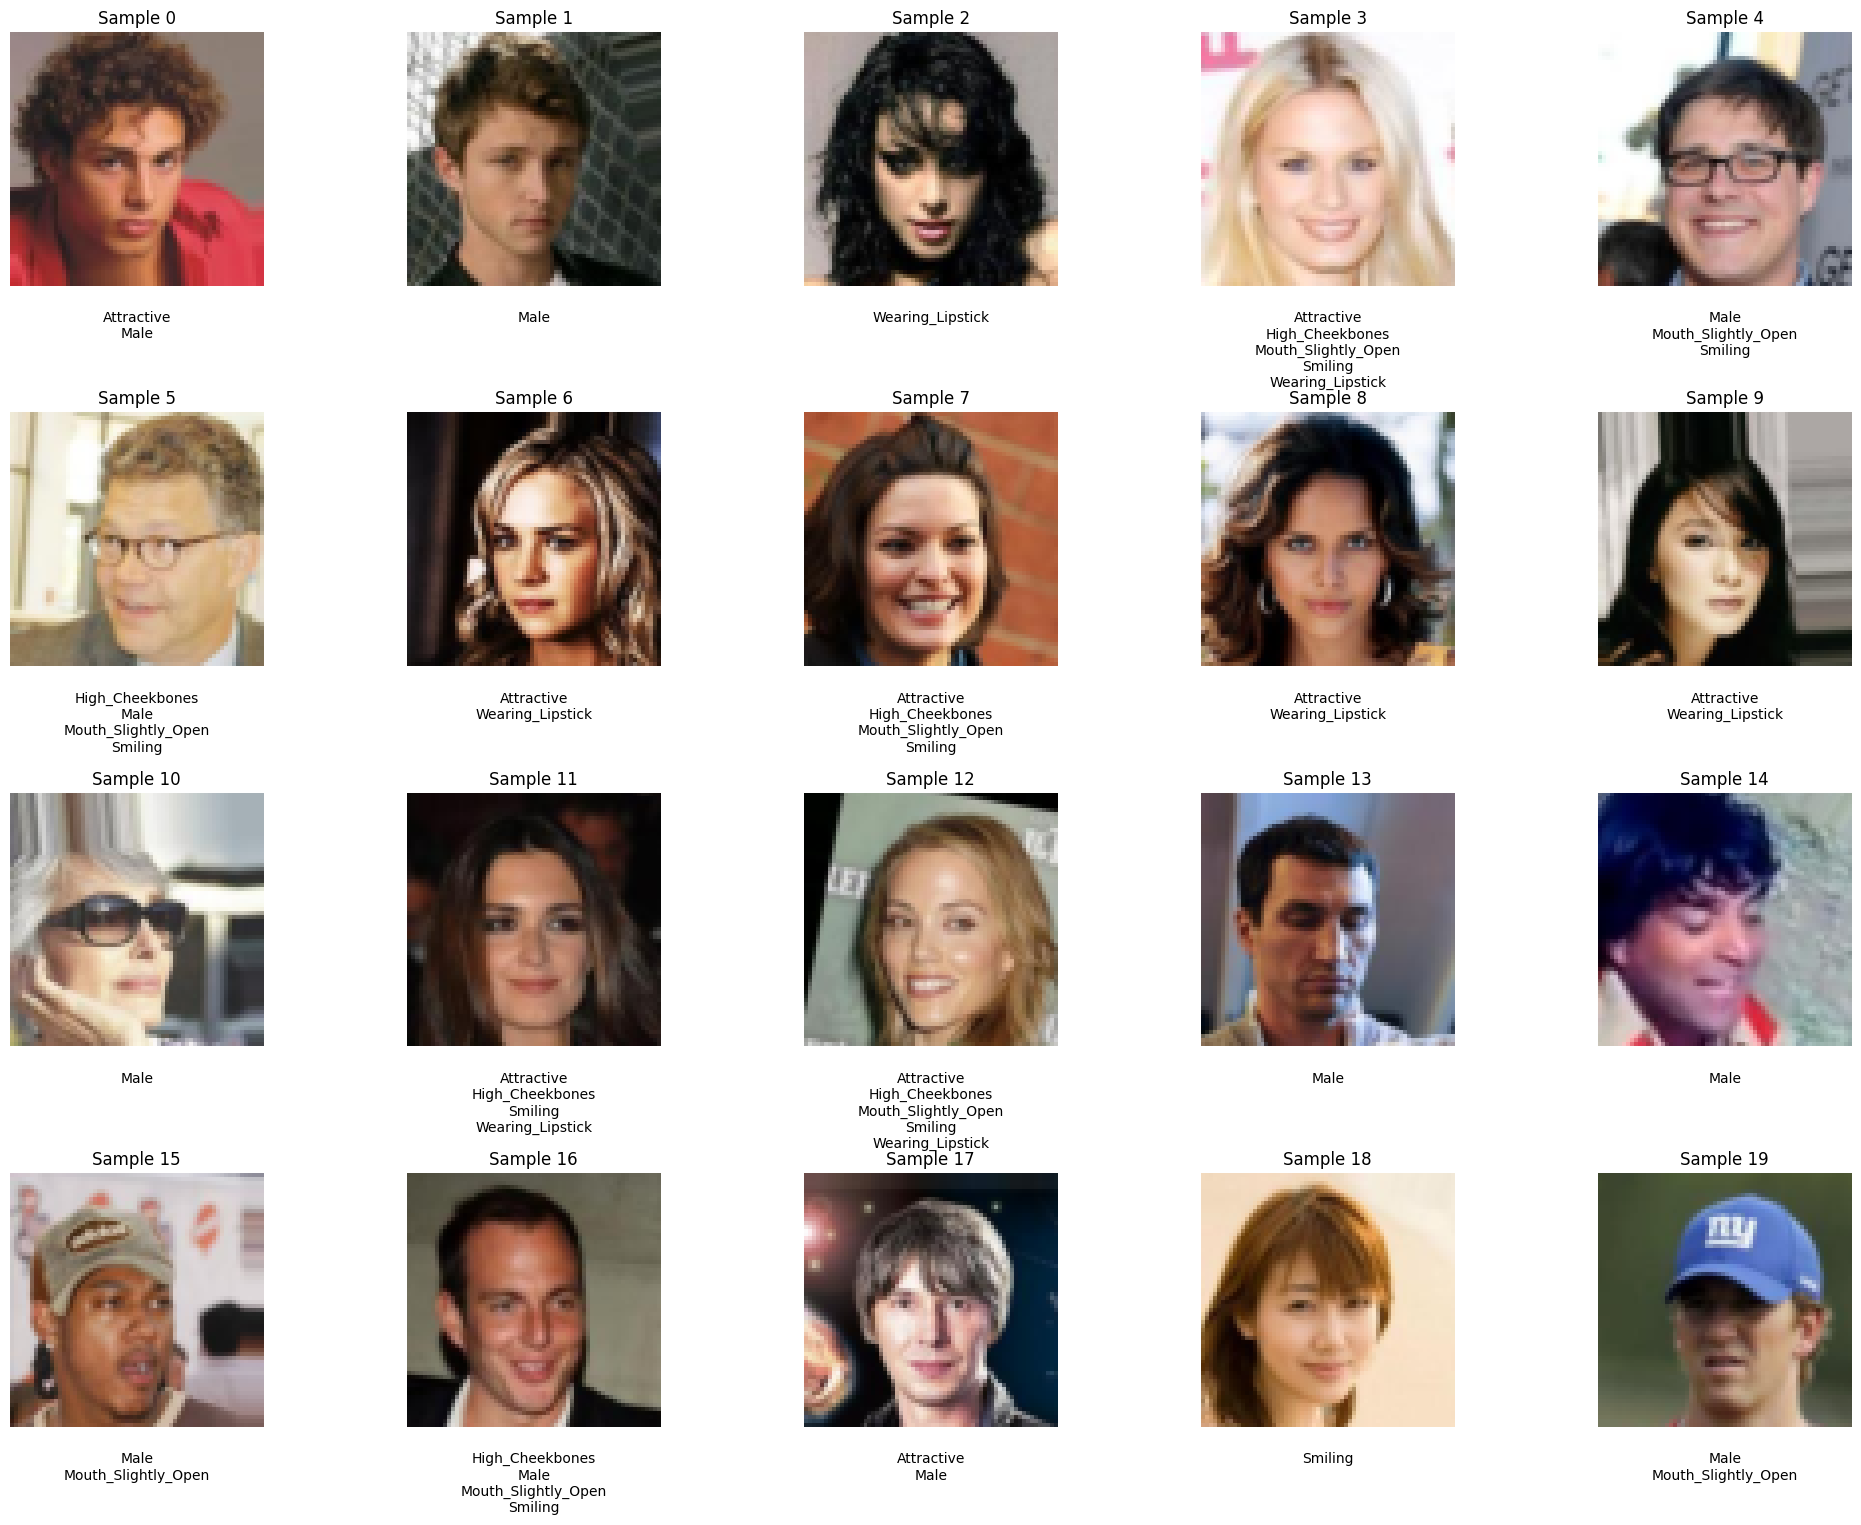

In [4]:
import matplotlib.pyplot as plt
import torch
import numpy as np

# Function to denormalize images
def denormalize(normalized_tensor):
    """
    Denormalizes a tensor that was normalized with 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    """
    return normalized_tensor * 0.5 + 0.5

# Plot the first 20 images
num_images = 20
rows = 4
cols = 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 16))

concept_names = ['Attractive',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Smiling',
 'Wearing_Lipstick']

# Iterate through the first 20 samples
for i in range(num_images):
    row = i // cols
    col = i % cols
    
    # Get the sample from the dataset
    (image, concept_vector), label = train_dataset[i]
    
    # Denormalize the image
    image = denormalize(image)
    
    # Convert to numpy and transpose for visualization
    if isinstance(image, torch.Tensor):
        img_np = image.permute(1, 2, 0).numpy()
    else:
        img_np = image.transpose(1, 2, 0)
    
    # Plot the image
    axes[row, col].imshow(img_np)
    axes[row, col].set_title(f"Sample {i}", fontsize=12)
    axes[row, col].axis('off')
    
    # Get the active concepts for this image
    active_concepts = []
    for j, value in enumerate(concept_vector):
        if value == 1:
            if j < len(concept_names):
                active_concepts.append(concept_names[j])
            else:
                active_concepts.append(f"Concept {j}")
    
    # Add the concepts as text below the image
    concepts_text = "\n".join(active_concepts)
    axes[row, col].text(0.5, -0.1, concepts_text, 
                         transform=axes[row, col].transAxes,
                         ha='center', va='top', 
                         fontsize=10, 
                         color='black',
                         wrap=True)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for text
plt.subplots_adjust(hspace=0.5)  # Add more space between rows
plt.show()

In [9]:
concepts_path = "/data/Datasets/tcav/celeba/"
concept_names = ['Attractive',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Smiling',
 'Wearing_Lipstick']

concepts = [
    assemble_concept(name, i, concepts_path=concepts_path) for i, name in enumerate(concept_names)
]

# stripes_concept = assemble_concept("striped", 0, concepts_path=concepts_path)
# zigzagged_concept = assemble_concept("zigzagged", 1, concepts_path=concepts_path)
# dotted_concept = assemble_concept("dotted", 2, concepts_path=concepts_path)

/data/Datasets/tcav/celeba/Attractive/
/data/Datasets/tcav/celeba/Attractive/example_249.pt
/data/Datasets/tcav/celeba/Attractive/example_265.pt
/data/Datasets/tcav/celeba/Attractive/example_71.pt
/data/Datasets/tcav/celeba/Attractive/example_41.pt
/data/Datasets/tcav/celeba/Attractive/example_80.pt
/data/Datasets/tcav/celeba/Attractive/example_206.pt
/data/Datasets/tcav/celeba/Attractive/example_23.pt
/data/Datasets/tcav/celeba/High_Cheekbones/
/data/Datasets/tcav/celeba/High_Cheekbones/example_249.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_265.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_71.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_41.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_80.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_206.pt
/data/Datasets/tcav/celeba/High_Cheekbones/example_23.pt
/data/Datasets/tcav/celeba/Male/
/data/Datasets/tcav/celeba/Male/example_249.pt
/data/Datasets/tcav/celeba/Male/example_265.pt
/data/Datasets/tcav/c

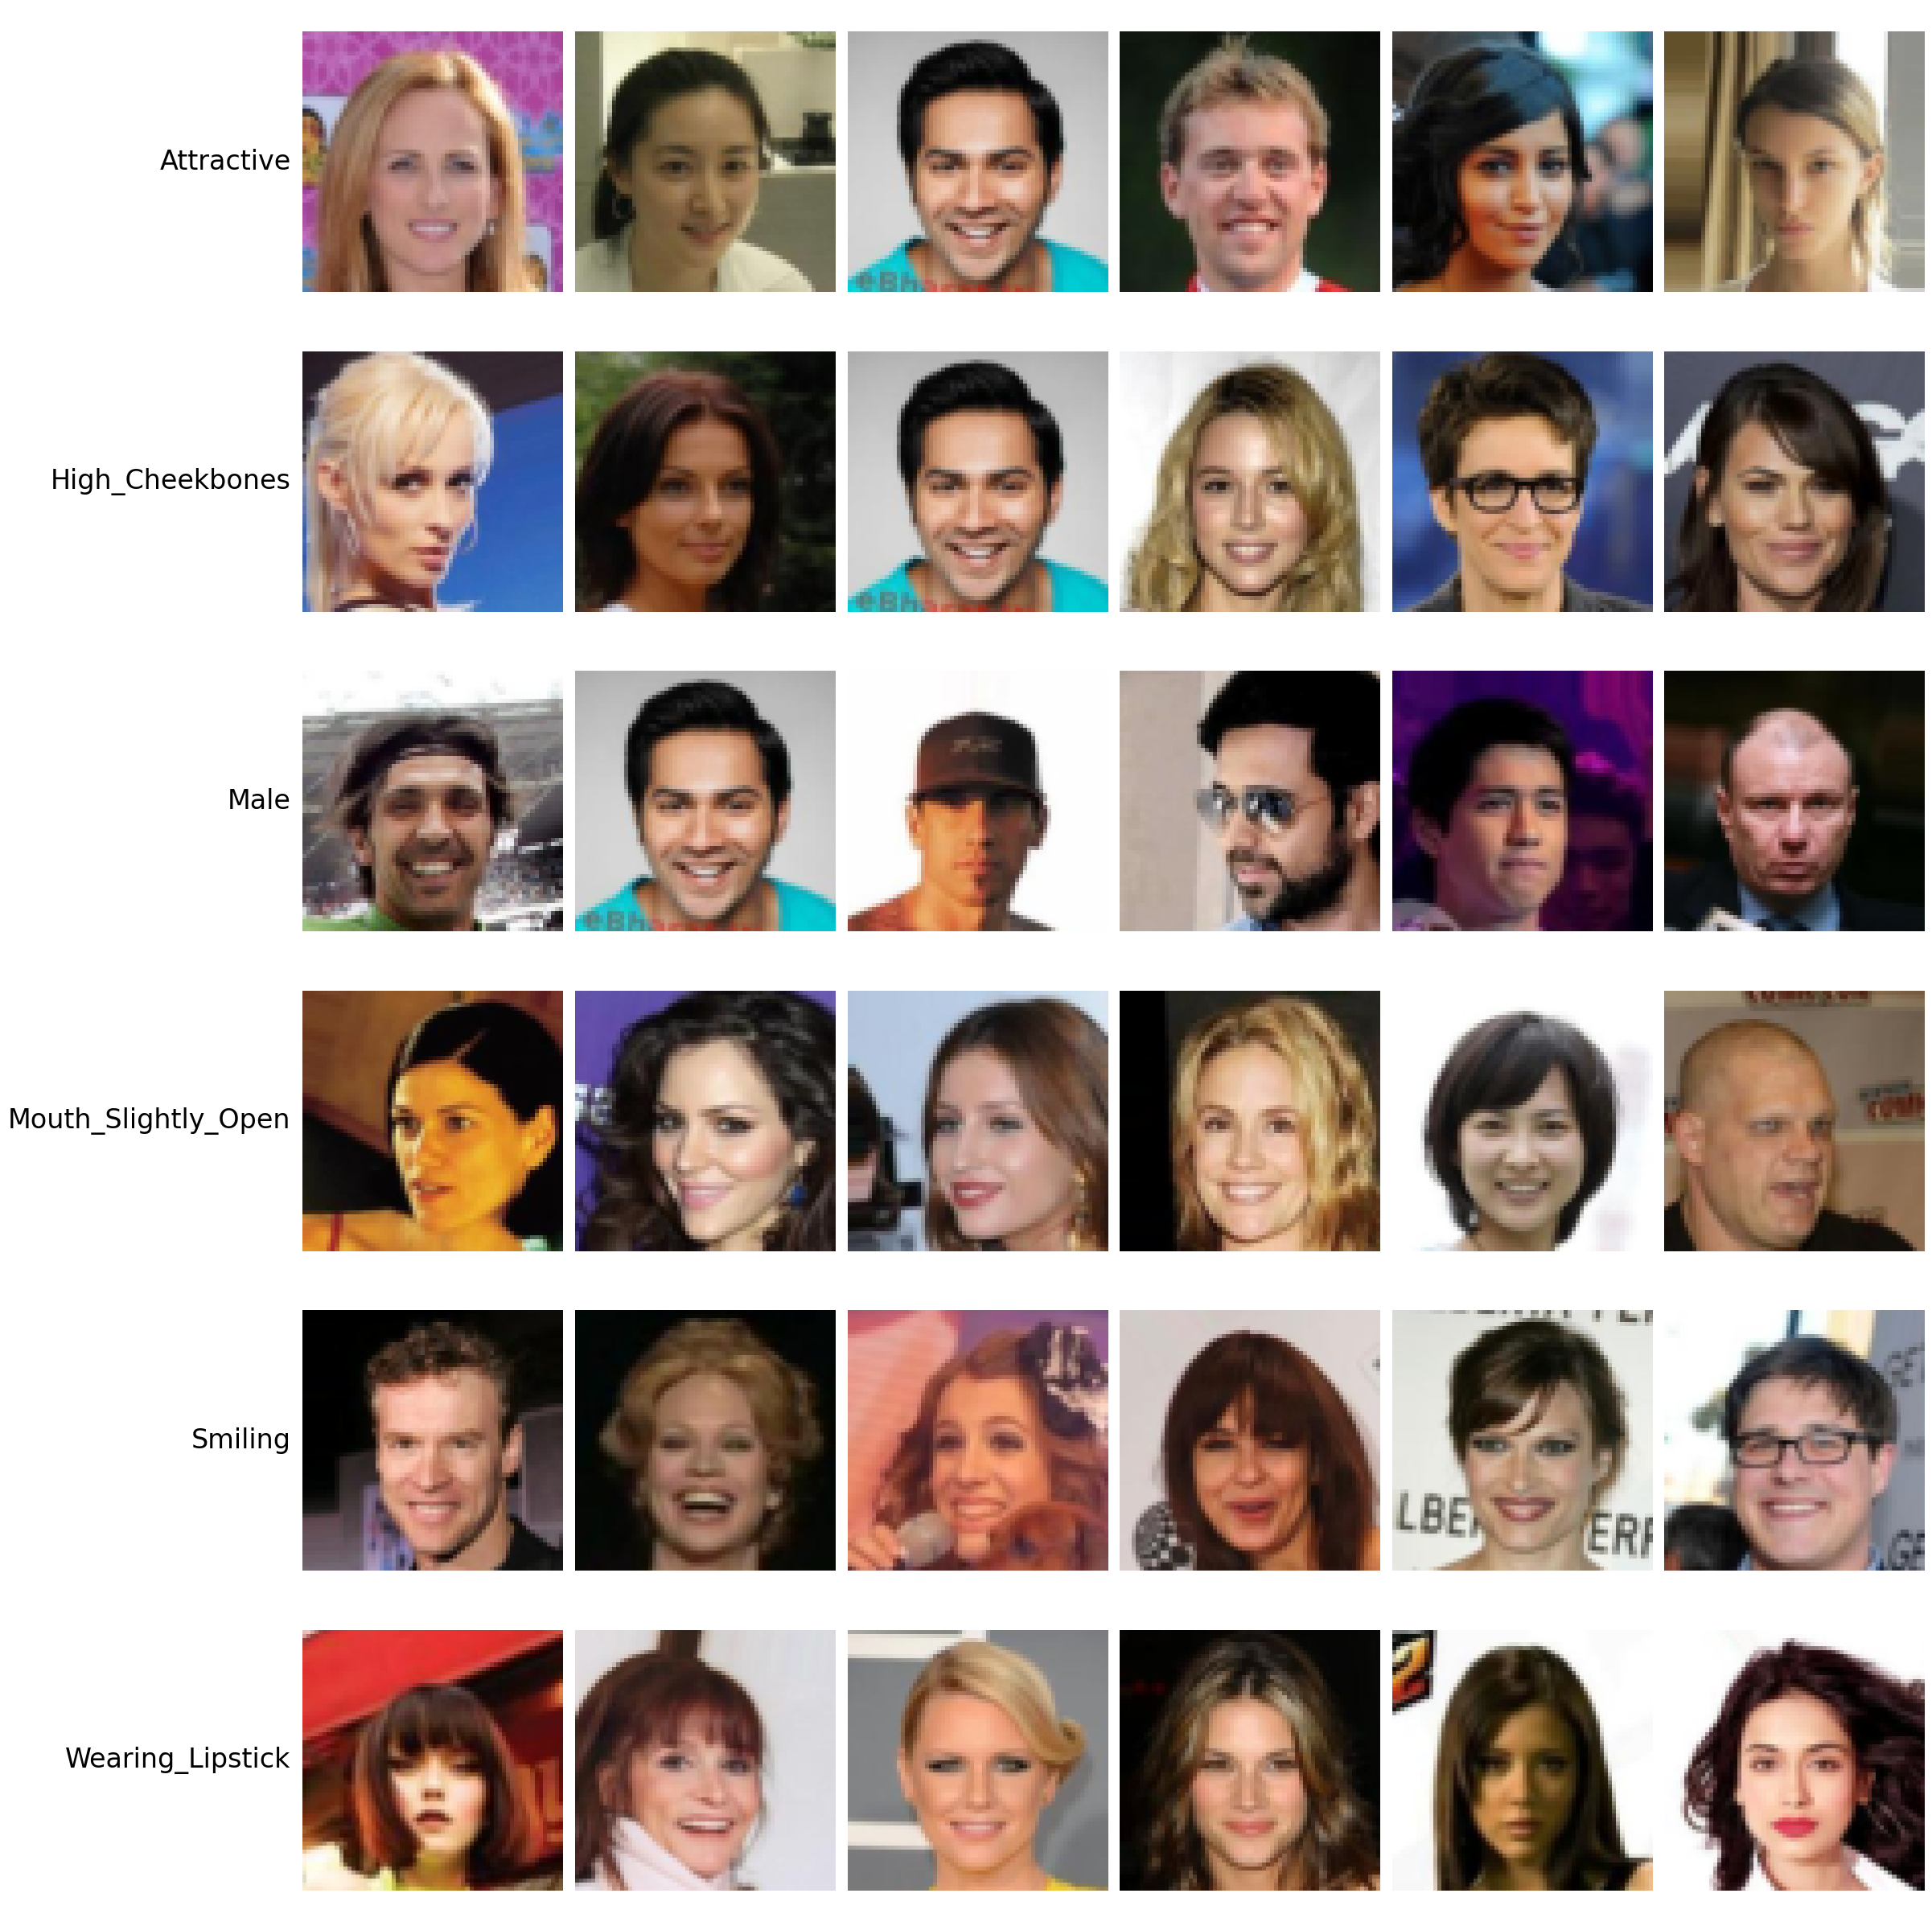

In [10]:
n_figs = 6
n_concepts = 6
import matplotlib.pyplot as plt
import torch
import os
import glob
import numpy as np
fig, axs = plt.subplots(n_concepts, n_figs + 1, figsize=(25, 4 * n_concepts))

def denormalize(normalized_tensor):
    """
    Denormalizes a tensor that was normalized with 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    """
    return normalized_tensor * 0.5 + 0.5

for c, concept in enumerate(concepts[:n_concepts]):
    concept_path = os.path.join(concepts_path, concept.name) + "/"
    pt_files = glob.glob(concept_path + '*.pt')
    print(concept_path)
    
    for i, pt_file in enumerate(pt_files[:n_figs + 1]):
        print(pt_file)
        if os.path.isfile(pt_file):
            if i == 0:
                axs[c, i].text(1.0, 0.5, str(concept.name), ha='right', va='center', family='sans-serif', size=24)
            else:
                # Load the PyTorch tensor
                img_tensor = torch.load(pt_file)
                
                # Denormalize if needed (assuming normalization was applied)
                img_tensor = denormalize(img_tensor)
                
                # Convert to numpy array for matplotlib
                # If tensor is [C,H,W] format, permute to [H,W,C] for display
                if len(img_tensor.shape) == 3 and img_tensor.shape[0] <= 3:
                    img_np = img_tensor.permute(1, 2, 0).cpu().numpy()
                    
                    # If it's a single channel image, squeeze the channel dimension
                    if img_tensor.shape[0] == 1:
                        img_np = img_np.squeeze(2)
                else:
                    img_np = img_tensor.cpu().numpy()
                
                # Ensure values are clipped between 0 and 1 for proper display
                img_np = np.clip(img_np, 0, 1)
                
                axs[c, i].imshow(img_np)
            
            axs[c, i].axis('off')

plt.tight_layout()
plt.show()

In [1]:
CONCEPT_SEMANTICS = [
    "5_o_Clock_Shadow",
    "Arched_Eyebrows",
    "Attractive",
    "Bags_Under_Eyes",
    "Bald",
    "Bangs",
    "Big_Lips",
    "Big_Nose",
    "Black_Hair",
    "Blond_Hair",
    "Blurry",
    "Brown_Hair",
    "Bushy_Eyebrows",
    "Chubby",
    "Double_Chin",
    "Eyeglasses",
    "Goatee",
    "Gray_Hair",
    "Heavy_Makeup",
    "High_Cheekbones",
    "Male",
    "Mouth_Slightly_Open",
    "Mustache",
    "Narrow_Eyes",
    "No_Beard",
    "Oval_Face",
    "Pale_Skin",
    "Pointy_Nose",
    "Receding_Hairline",
    "Rosy_Cheeks",
    "Sideburns",
    "Smiling",
    "Straight_Hair",
    "Wavy_Hair",
    "Wearing_Earrings",
    "Wearing_Hat",
    "Wearing_Lipstick",
    "Wearing_Necklace",
    "Wearing_Necktie",
    "Young",
]
for idxa in [2, 19, 20, 21, 31, 36]:
    print(f"Concept {idxa}: {CONCEPT_SEMANTICS[idxa]}")
#[2, 18, 19, 20, 21, 31, 33, 36]

concept_names = [CONCEPT_SEMANTICS[idxa] for idxa in [2, 18, 19, 20, 21, 31, 33, 36]]

Concept 2: Attractive
Concept 19: High_Cheekbones
Concept 20: Male
Concept 21: Mouth_Slightly_Open
Concept 31: Smiling
Concept 36: Wearing_Lipstick


In [4]:
len(CONCEPT_SEMANTICS)

40

In [2]:
concept_names

['Attractive',
 'Heavy_Makeup',
 'High_Cheekbones',
 'Male',
 'Mouth_Slightly_Open',
 'Smiling',
 'Wavy_Hair',
 'Wearing_Lipstick']

In [4]:

import os
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm
import random


# Create the main directory
tcav_dir = "/data/Datasets/tcav/celeba/"
os.makedirs(tcav_dir, exist_ok=True)

# Create a directory for each concept
num_concepts = dataset_config["num_concepts"]
for concept_idx in range(num_concepts):
    concept_dir = os.path.join(tcav_dir, concept_names[concept_idx])
    os.makedirs(concept_dir, exist_ok=True)

# Create a dataloader to iterate through the dataset
train_loader = DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True,
    num_workers=dataset_config["num_workers"]
)

# Store indices of examples where each concept is activated
concept_examples = [[] for _ in range(num_concepts)]

# Iterate through the dataset to collect examples
print("Finding examples with activated concepts...")
for batch_idx, ((images, concepts), labels) in enumerate(tqdm(train_loader)):
    # Handle concept vectors to find examples where concepts are activated
    concept_vectors = concepts  # This is the binary concept vector
    print(concepts)
    
    # For each concept, find examples where it's activated (=1)
    for concept_idx in range(num_concepts):
        # Find examples in this batch where the concept is activated
        print(concept_vectors[:, concept_idx])
        activated_indices = torch.where(concept_vectors[:, concept_idx] == 1)[0].cpu().numpy()
        
        # Convert batch indices to dataset indices
        dataset_indices = [batch_idx * train_loader.batch_size + idx for idx in activated_indices]
        concept_examples[concept_idx].extend(dataset_indices)
    
    # Check if we have enough examples for all concepts
    if all(len(examples) >= 300 for examples in concept_examples):
        break

# For each concept, select and save 300 examples
print("Saving examples for each concept...")
for concept_idx in range(num_concepts):
    concept_dir = os.path.join(tcav_dir, concept_names[concept_idx])
    
    # Select 300 random examples (or all if fewer than 300)
    selected_examples = concept_examples[concept_idx]
    if len(selected_examples) > 300:
        selected_examples = random.sample(selected_examples, 300)
    
    print(f"Saving {len(selected_examples)} examples for concept {concept_names[concept_idx]}")
    
    # Save each example as an individual tensor file
    for i, example_idx in enumerate(selected_examples):
        ((image, _), _) = train_dataset[example_idx]
        save_path = os.path.join(concept_dir, f"example_{i}.pt")
        torch.save(image, save_path)

print(f"Successfully saved concept examples to {tcav_dir}")


Finding examples with activated concepts...


  8%|▊         | 14/185 [00:00<00:04, 35.91it/s]

tensor([[0., 0., 0., 1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 1., 1., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 1., 1.],
        [1., 0., 0., 0., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1., 1., 1., 1.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 1., 0., 1., 1., 0., 1.],
        [0., 0., 0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 1., 0., 0., 1., 1., 1.],
        [1., 1., 1., 0., 0., 0., 1., 1.],
        [0., 0., 0., 1., 1., 1., 0., 0.],
        [1., 0., 0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 1., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 1., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 0

  8%|▊         | 14/185 [00:00<00:07, 22.01it/s]


Saving examples for each concept...
Saving 300 examples for concept Attractive
Saving 300 examples for concept Heavy_Makeup
Saving 300 examples for concept High_Cheekbones
Saving 300 examples for concept Male
Saving 300 examples for concept Mouth_Slightly_Open
Saving 300 examples for concept Smiling
Saving 300 examples for concept Wavy_Hair
Saving 300 examples for concept Wearing_Lipstick
Successfully saved concept examples to /data/Datasets/tcav/celeba/


Verifying concept extraction for individual images:

Example 0:
Concept vector: tensor([1., 0., 0., 1., 0., 0., 1., 0.])
Activated concepts: Attractive, Male, Wavy_Hair


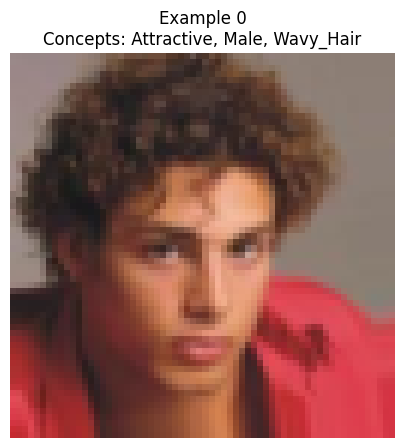


Example 1:
Concept vector: tensor([0., 0., 0., 1., 0., 0., 0., 0.])
Activated concepts: Male


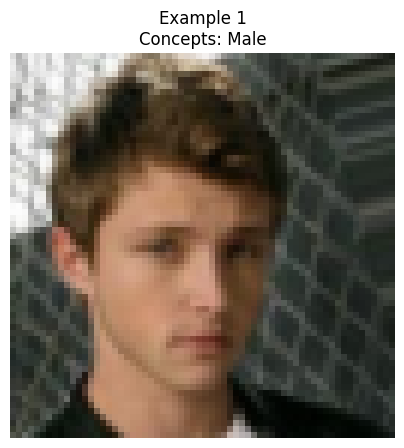


Example 2:
Concept vector: tensor([0., 1., 0., 0., 0., 0., 1., 1.])
Activated concepts: Heavy_Makeup, Wavy_Hair, Wearing_Lipstick


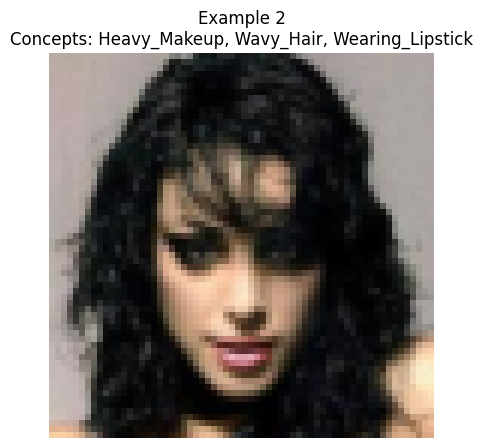


Example 3:
Concept vector: tensor([1., 1., 1., 0., 1., 1., 0., 1.])
Activated concepts: Attractive, Heavy_Makeup, High_Cheekbones, Mouth_Slightly_Open, Smiling, Wearing_Lipstick


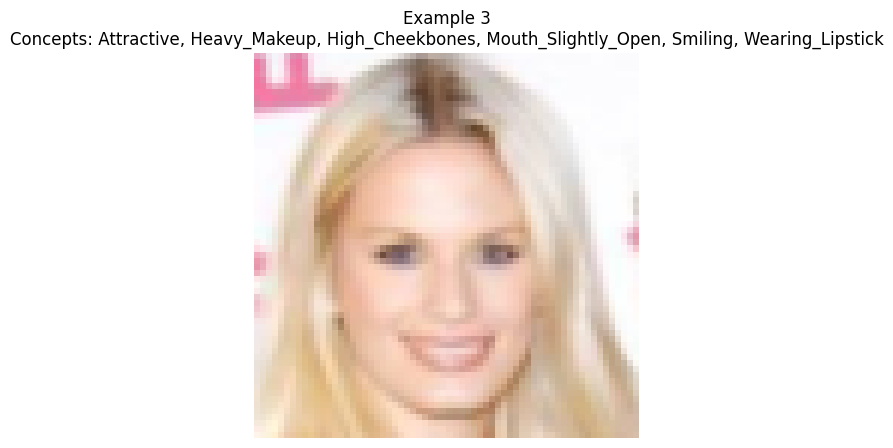


Example 4:
Concept vector: tensor([0., 0., 0., 1., 1., 1., 0., 0.])
Activated concepts: Male, Mouth_Slightly_Open, Smiling


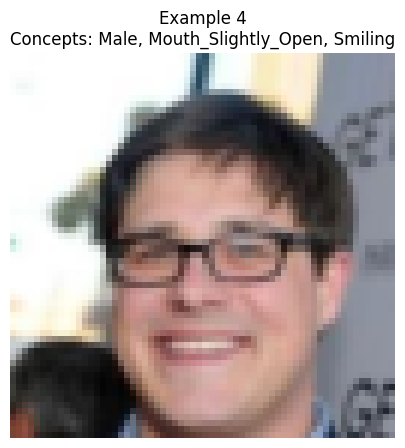


Example 5:
Concept vector: tensor([0., 0., 1., 1., 1., 1., 1., 0.])
Activated concepts: High_Cheekbones, Male, Mouth_Slightly_Open, Smiling, Wavy_Hair


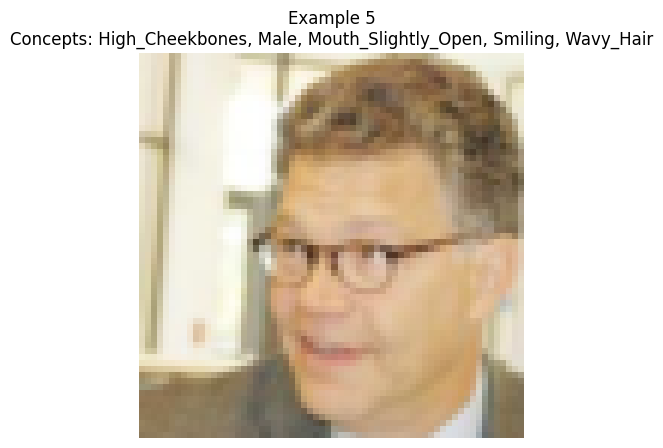


Example 6:
Concept vector: tensor([1., 1., 0., 0., 0., 0., 1., 1.])
Activated concepts: Attractive, Heavy_Makeup, Wavy_Hair, Wearing_Lipstick


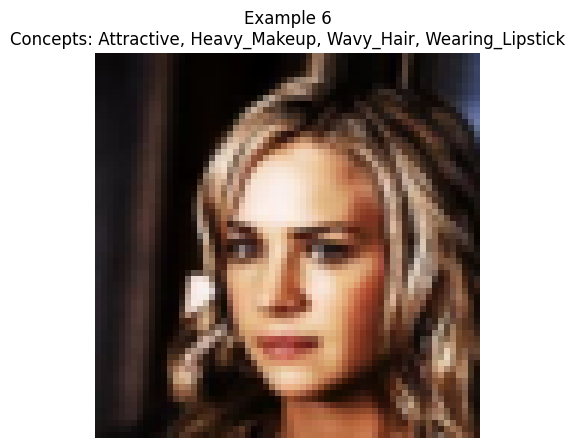


Example 7:
Concept vector: tensor([1., 0., 1., 0., 1., 1., 0., 0.])
Activated concepts: Attractive, High_Cheekbones, Mouth_Slightly_Open, Smiling


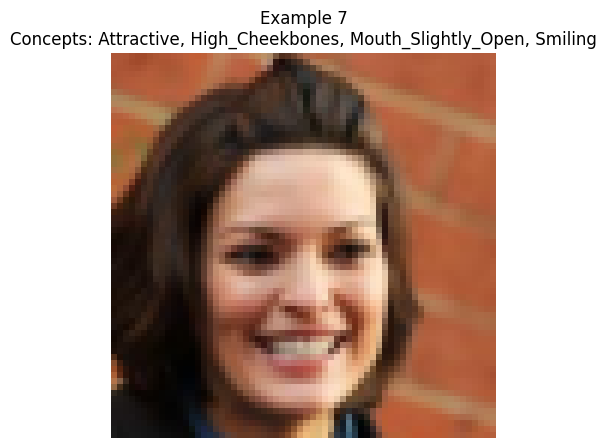


Example 8:
Concept vector: tensor([1., 1., 0., 0., 0., 0., 1., 1.])
Activated concepts: Attractive, Heavy_Makeup, Wavy_Hair, Wearing_Lipstick


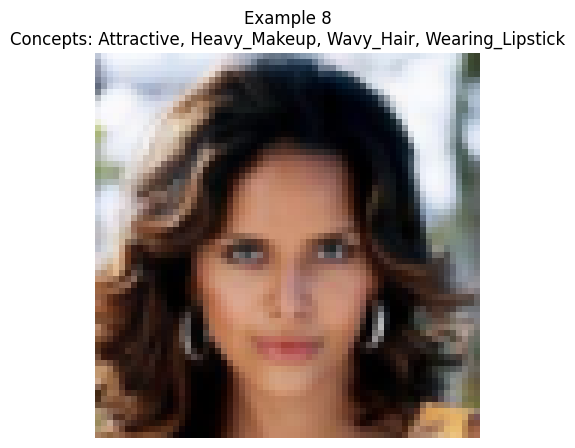


Example 9:
Concept vector: tensor([1., 1., 0., 0., 0., 0., 0., 1.])
Activated concepts: Attractive, Heavy_Makeup, Wearing_Lipstick


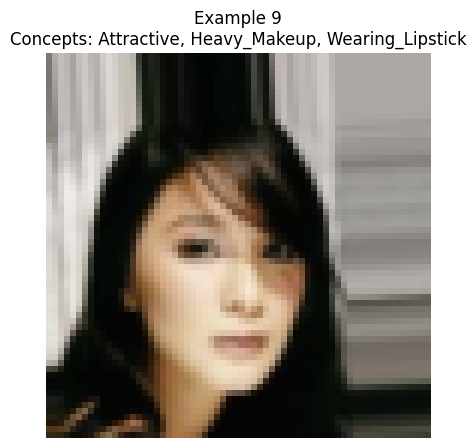

Concept counts: [1587, 1208, 1424, 1325, 1495, 1478, 1000, 1467]:  31%|███       | 3111/10000 [00:04<00:10, 642.23it/s]



Saving examples for each concept...
Saving 1000 examples for concept 'Attractive'
Saving 1000 examples for concept 'Heavy_Makeup'
Saving 1000 examples for concept 'High_Cheekbones'
Saving 1000 examples for concept 'Male'
Saving 1000 examples for concept 'Mouth_Slightly_Open'
Saving 1000 examples for concept 'Smiling'
Saving 1000 examples for concept 'Wavy_Hair'
Saving 1000 examples for concept 'Wearing_Lipstick'

Summary of collected examples:
Concept 'Attractive': 1587 examples found, 1000 saved
Concept 'Heavy_Makeup': 1208 examples found, 1000 saved
Concept 'High_Cheekbones': 1424 examples found, 1000 saved
Concept 'Male': 1325 examples found, 1000 saved
Concept 'Mouth_Slightly_Open': 1495 examples found, 1000 saved
Concept 'Smiling': 1478 examples found, 1000 saved
Concept 'Wavy_Hair': 1000 examples found, 1000 saved
Concept 'Wearing_Lipstick': 1467 examples found, 1000 saved

Successfully saved concept examples to /data/Datasets/tcav/celeba/


In [4]:
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import random
# Function to denormalize images
def denormalize(normalized_tensor):
    """
    Denormalizes a tensor that was normalized with 
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    """
    return normalized_tensor * 0.5 + 0.5

# Create the main directory
tcav_dir = "/data/Datasets/tcav/celeba/"
os.makedirs(tcav_dir, exist_ok=True)

# Create a directory for each concept
num_concepts = dataset_config["num_concepts"]
for concept_idx in range(num_concepts):
    concept_dir = os.path.join(tcav_dir, concept_names[concept_idx])
    os.makedirs(concept_dir, exist_ok=True)

# # Analyze a set of example images to verify concept extraction
# num_examples_to_verify = 10  # Adjust this number as needed

# print("Verifying concept extraction for individual images:")
# for example_idx in range(num_examples_to_verify):
#     # Get the sample from the dataset
#     (image, concept_vector), label = train_dataset[example_idx]
    
#     # Print information about this example
#     print(f"\nExample {example_idx}:")
#     print(f"Concept vector: {concept_vector}")
    
#     # Print which concepts are activated for this image
#     activated_concepts = []
#     for concept_idx in range(num_concepts):
#         if concept_vector[concept_idx] == 1:
#             activated_concepts.append(concept_names[concept_idx])
    
#     print(f"Activated concepts: {', '.join(activated_concepts)}")
    
#     # Display the image with its concepts
#     plt.figure(figsize=(5, 5))
    
#     # Denormalize the image for display
#     img_display = denormalize(image)
#     if isinstance(img_display, torch.Tensor):
#         img_display = img_display.permute(1, 2, 0).cpu().numpy()
#     else:
#         img_display = img_display.transpose(1, 2, 0)
    
#     plt.imshow(img_display)
#     plt.title(f"Example {example_idx}\nConcepts: {', '.join(activated_concepts)}")
#     plt.axis('off')
#     plt.show()

    # # Save this example to the appropriate concept directories
    # for concept_idx in range(num_concepts):
    #     if concept_vector[concept_idx] == 1:
    #         concept_dir = os.path.join(tcav_dir, concept_names[concept_idx])
    #         save_path = os.path.join(concept_dir, f"example_from_idx_{example_idx}.pt")
    #         torch.save(image, save_path)
    #         print(f"Saved to: {save_path}")

# After verifying individual examples, proceed with collecting examples for each concept
print("\nCollecting examples for each concept...")

# Store indices of examples where each concept is activated
concept_examples = [[] for _ in range(num_concepts)]

# Sampling strategy parameters
samples_needed_per_concept = 100
max_samples_to_check = 10000  # Limit how many samples we check
batch_size = 64

# Iterate through individual examples (this is slower but more controlled than batch processing)
#progress_bar = tqdm(range(min(max_samples_to_check, len(train_dataset))))
indices = list(range(min(max_samples_to_check, len(train_dataset))))
random.shuffle(indices)  # In-place shuffle

# Use the shuffled indices with tqdm
progress_bar = tqdm(indices)
all_concepts_collected = False

for idx in progress_bar:
    # Get sample
    (image, concept_vector), label = train_dataset[idx]
    
    # Check which concepts are activated in this example
    for concept_idx in range(num_concepts):
        if concept_vector[concept_idx] == 1:
            concept_examples[concept_idx].append(idx)
    
    # Update progress information
    concept_counts = [len(examples) for examples in concept_examples]
    progress_bar.set_description(f"Concept counts: {concept_counts}")
    
    # Check if we have enough examples for all concepts
    if all(len(examples) >= samples_needed_per_concept for examples in concept_examples):
        all_concepts_collected = True
        break

# For each concept, select and save examples
print("\nSaving examples for each concept...")

for concept_idx in range(num_concepts):
    concept_dir = os.path.join(tcav_dir, concept_names[concept_idx])
    
    # Select examples (random sample if we have more than needed)
    selected_examples = concept_examples[concept_idx]
    if len(selected_examples) > samples_needed_per_concept:
        selected_examples = random.sample(selected_examples, samples_needed_per_concept)
    
    print(f"Saving {len(selected_examples)} examples for concept '{concept_names[concept_idx]}'")
    
    # Save each example as an individual tensor file
    for i, example_idx in enumerate(selected_examples):
        ((image, _), _) = train_dataset[example_idx]
        save_path = os.path.join(concept_dir, f"example_{i}.pt")
        torch.save(image, save_path)

# Print a summary
print("\nSummary of collected examples:")
for concept_idx in range(num_concepts):
    print(f"Concept '{concept_names[concept_idx]}': {len(concept_examples[concept_idx])} examples found, " 
          f"{min(samples_needed_per_concept, len(concept_examples[concept_idx]))} saved")

print(f"\nSuccessfully saved concept examples to {tcav_dir}")


In [6]:
num_random_concepts = 11  # for random_0 to random_10
random_concept_names = [f"random_{i}" for i in range(num_random_concepts)]

# Create directories for random concepts (add this right after you create directories for named concepts)
for random_concept in random_concept_names:
    random_concept_dir = os.path.join(tcav_dir, random_concept)
    os.makedirs(random_concept_dir, exist_ok=True)

# After processing the named concepts, add this code to create random concepts
print("\nCreating random concepts...")

# Pool of indices from which to sample (assuming we want to use the same dataset)
available_indices = list(range(len(train_dataset)))
random.shuffle(available_indices)

# For each random concept, select and save examples
for concept_idx, random_concept in enumerate(random_concept_names):
    concept_dir = os.path.join(tcav_dir, random_concept)
    
    # Select random examples from the dataset
    selected_examples = random.sample(available_indices, samples_needed_per_concept)
    
    print(f"Saving {len(selected_examples)} examples for random concept '{random_concept}'")
    
    # Save each example as an individual tensor file
    for i, example_idx in enumerate(selected_examples):
        ((image, _), _) = train_dataset[example_idx]
        save_path = os.path.join(concept_dir, f"example_{i}.pt")
        torch.save(image, save_path)

# Update the summary to include random concepts
print("\nSummary of random concepts:")
for random_concept in random_concept_names:
    print(f"Random concept '{random_concept}': {samples_needed_per_concept} examples saved")


Creating random concepts...
Saving 1000 examples for random concept 'random_0'
Saving 1000 examples for random concept 'random_1'
Saving 1000 examples for random concept 'random_2'
Saving 1000 examples for random concept 'random_3'
Saving 1000 examples for random concept 'random_4'
Saving 1000 examples for random concept 'random_5'
Saving 1000 examples for random concept 'random_6'
Saving 1000 examples for random concept 'random_7'
Saving 1000 examples for random concept 'random_8'
Saving 1000 examples for random concept 'random_9'
Saving 1000 examples for random concept 'random_10'

Summary of random concepts:
Random concept 'random_0': 1000 examples saved
Random concept 'random_1': 1000 examples saved
Random concept 'random_2': 1000 examples saved
Random concept 'random_3': 1000 examples saved
Random concept 'random_4': 1000 examples saved
Random concept 'random_5': 1000 examples saved
Random concept 'random_6': 1000 examples saved
Random concept 'random_7': 1000 examples saved
Rand

/tmp/ipykernel_1238199/2253633108.py:24: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tensor = torch.load(example_path)*0.5 + 0.5


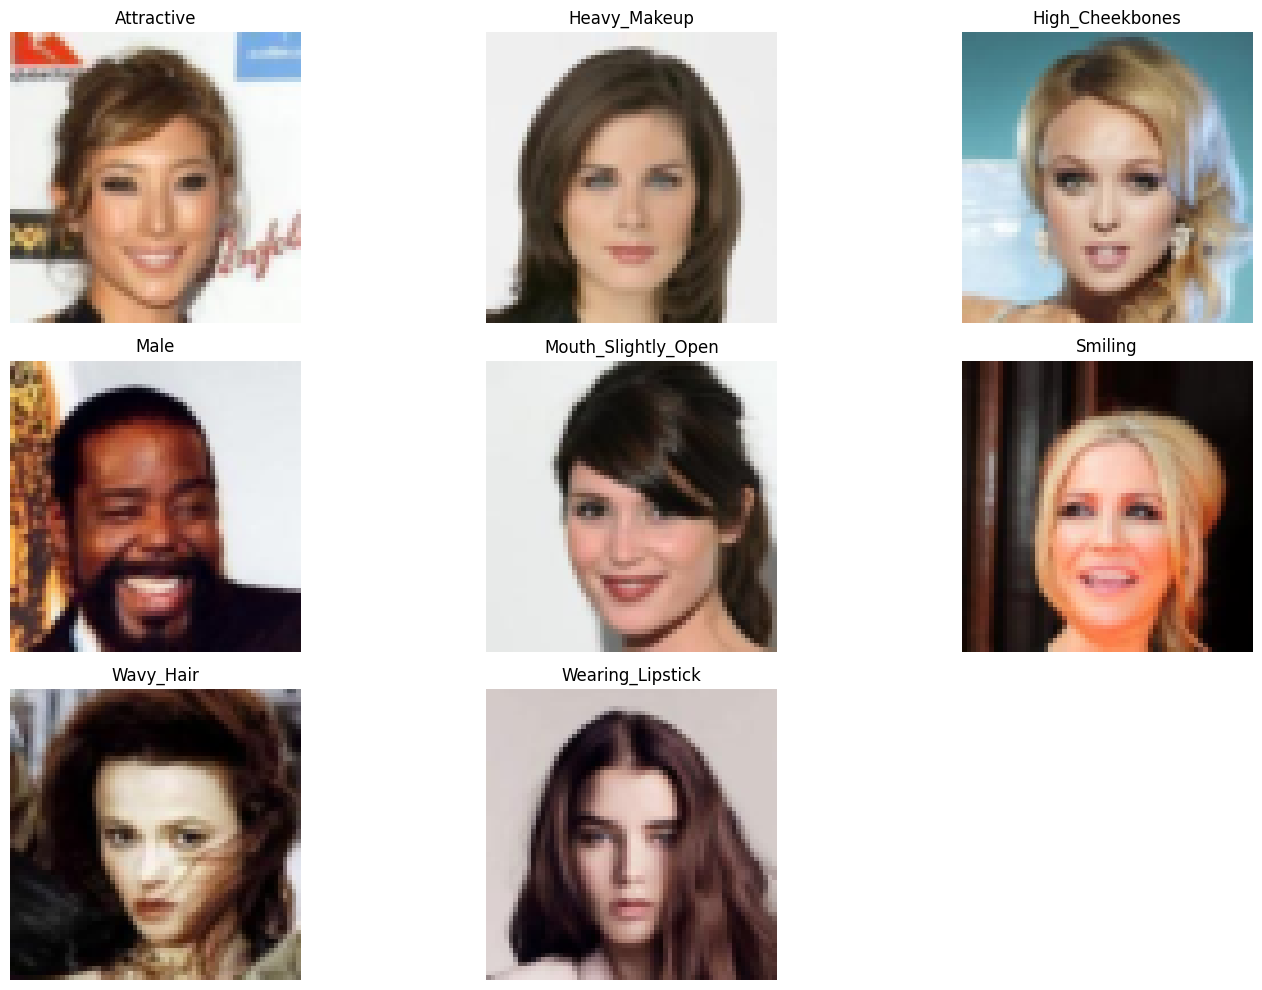

In [5]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the inverse transformations
# The original normalization used mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)
# To undo this, we use mean=(-1, -1, -1), std=(2, 2, 2)
inverse_transforms = transforms.Compose([
    transforms.ToPILImage()  # Convert tensor to PIL image for display
])

# List of concept names

# Base path where the concept examples are stored
base_path = "/data/Datasets/tcav/celeba/"

# Create a figure for displaying images
plt.figure(figsize=(15, 10))

# Load and display an example for each concept
for i, concept in enumerate(concept_names):
    # Load the PyTorch tensor
    example_path = f"{base_path}{concept}/example_2.pt"
    tensor = torch.load(example_path)*0.5 + 0.5
    
    # Apply inverse transformations to get displayable image
    image =  tensor.permute(1, 2, 0).cpu().numpy()

    
    # Add to subplot
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(concept)
    plt.axis("off")

plt.tight_layout()
plt.show()


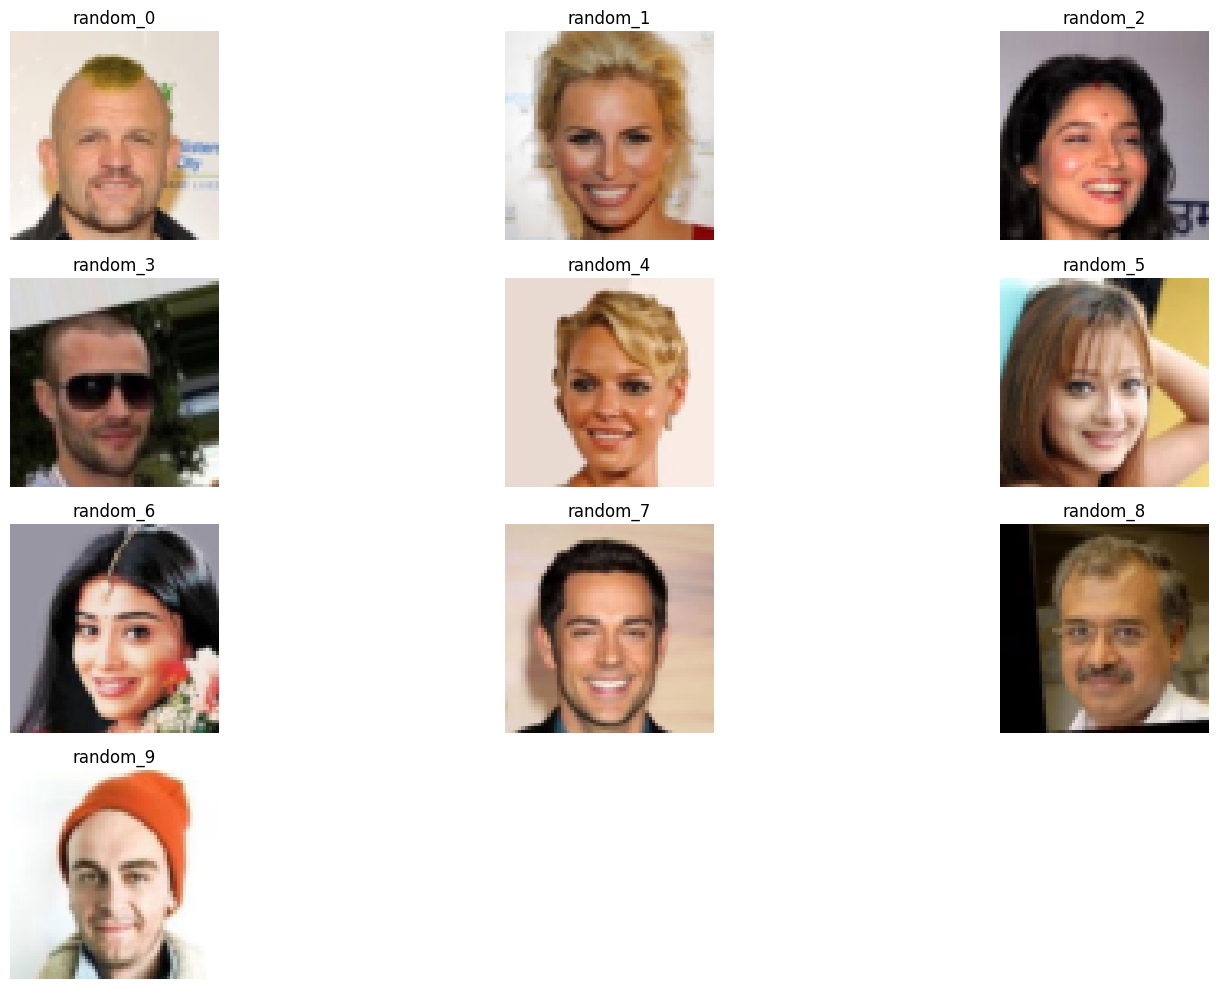

In [11]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the inverse transformations
# The original normalization used mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)
# To undo this, we use mean=(-1, -1, -1), std=(2, 2, 2)
inverse_transforms = transforms.Compose([
    transforms.ToPILImage()  # Convert tensor to PIL image for display
])

# List of concept names

# Base path where the concept examples are stored
base_path = "/data/Datasets/tcav/celeba/"

# Create a figure for displaying images
plt.figure(figsize=(15, 10))
random_concept_names = [f"random_{i}" for i in range(10)]
# Load and display an example for each concept
for i, concept in enumerate(random_concept_names):
    # Load the PyTorch tensor
    example_path = f"{base_path}{concept}/example_0.pt"
    tensor = torch.load(example_path)*0.5 + 0.5
    
    # Apply inverse transformations to get displayable image
    image =  tensor.permute(1, 2, 0).cpu().numpy()

    
    # Add to subplot
    plt.subplot(4, 3, i+1)
    plt.imshow(image)
    plt.title(concept)
    plt.axis("off")

plt.tight_layout()
plt.show()
